In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/My Drive/Datasets')
os.listdir('.')

['iris.csv',
 'heart.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'auto.csv',
 'winequality-white.csv']

In [5]:
dataset = pd.read_csv('auto.csv')
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [7]:
dataset.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<Figure size 1440x864 with 0 Axes>

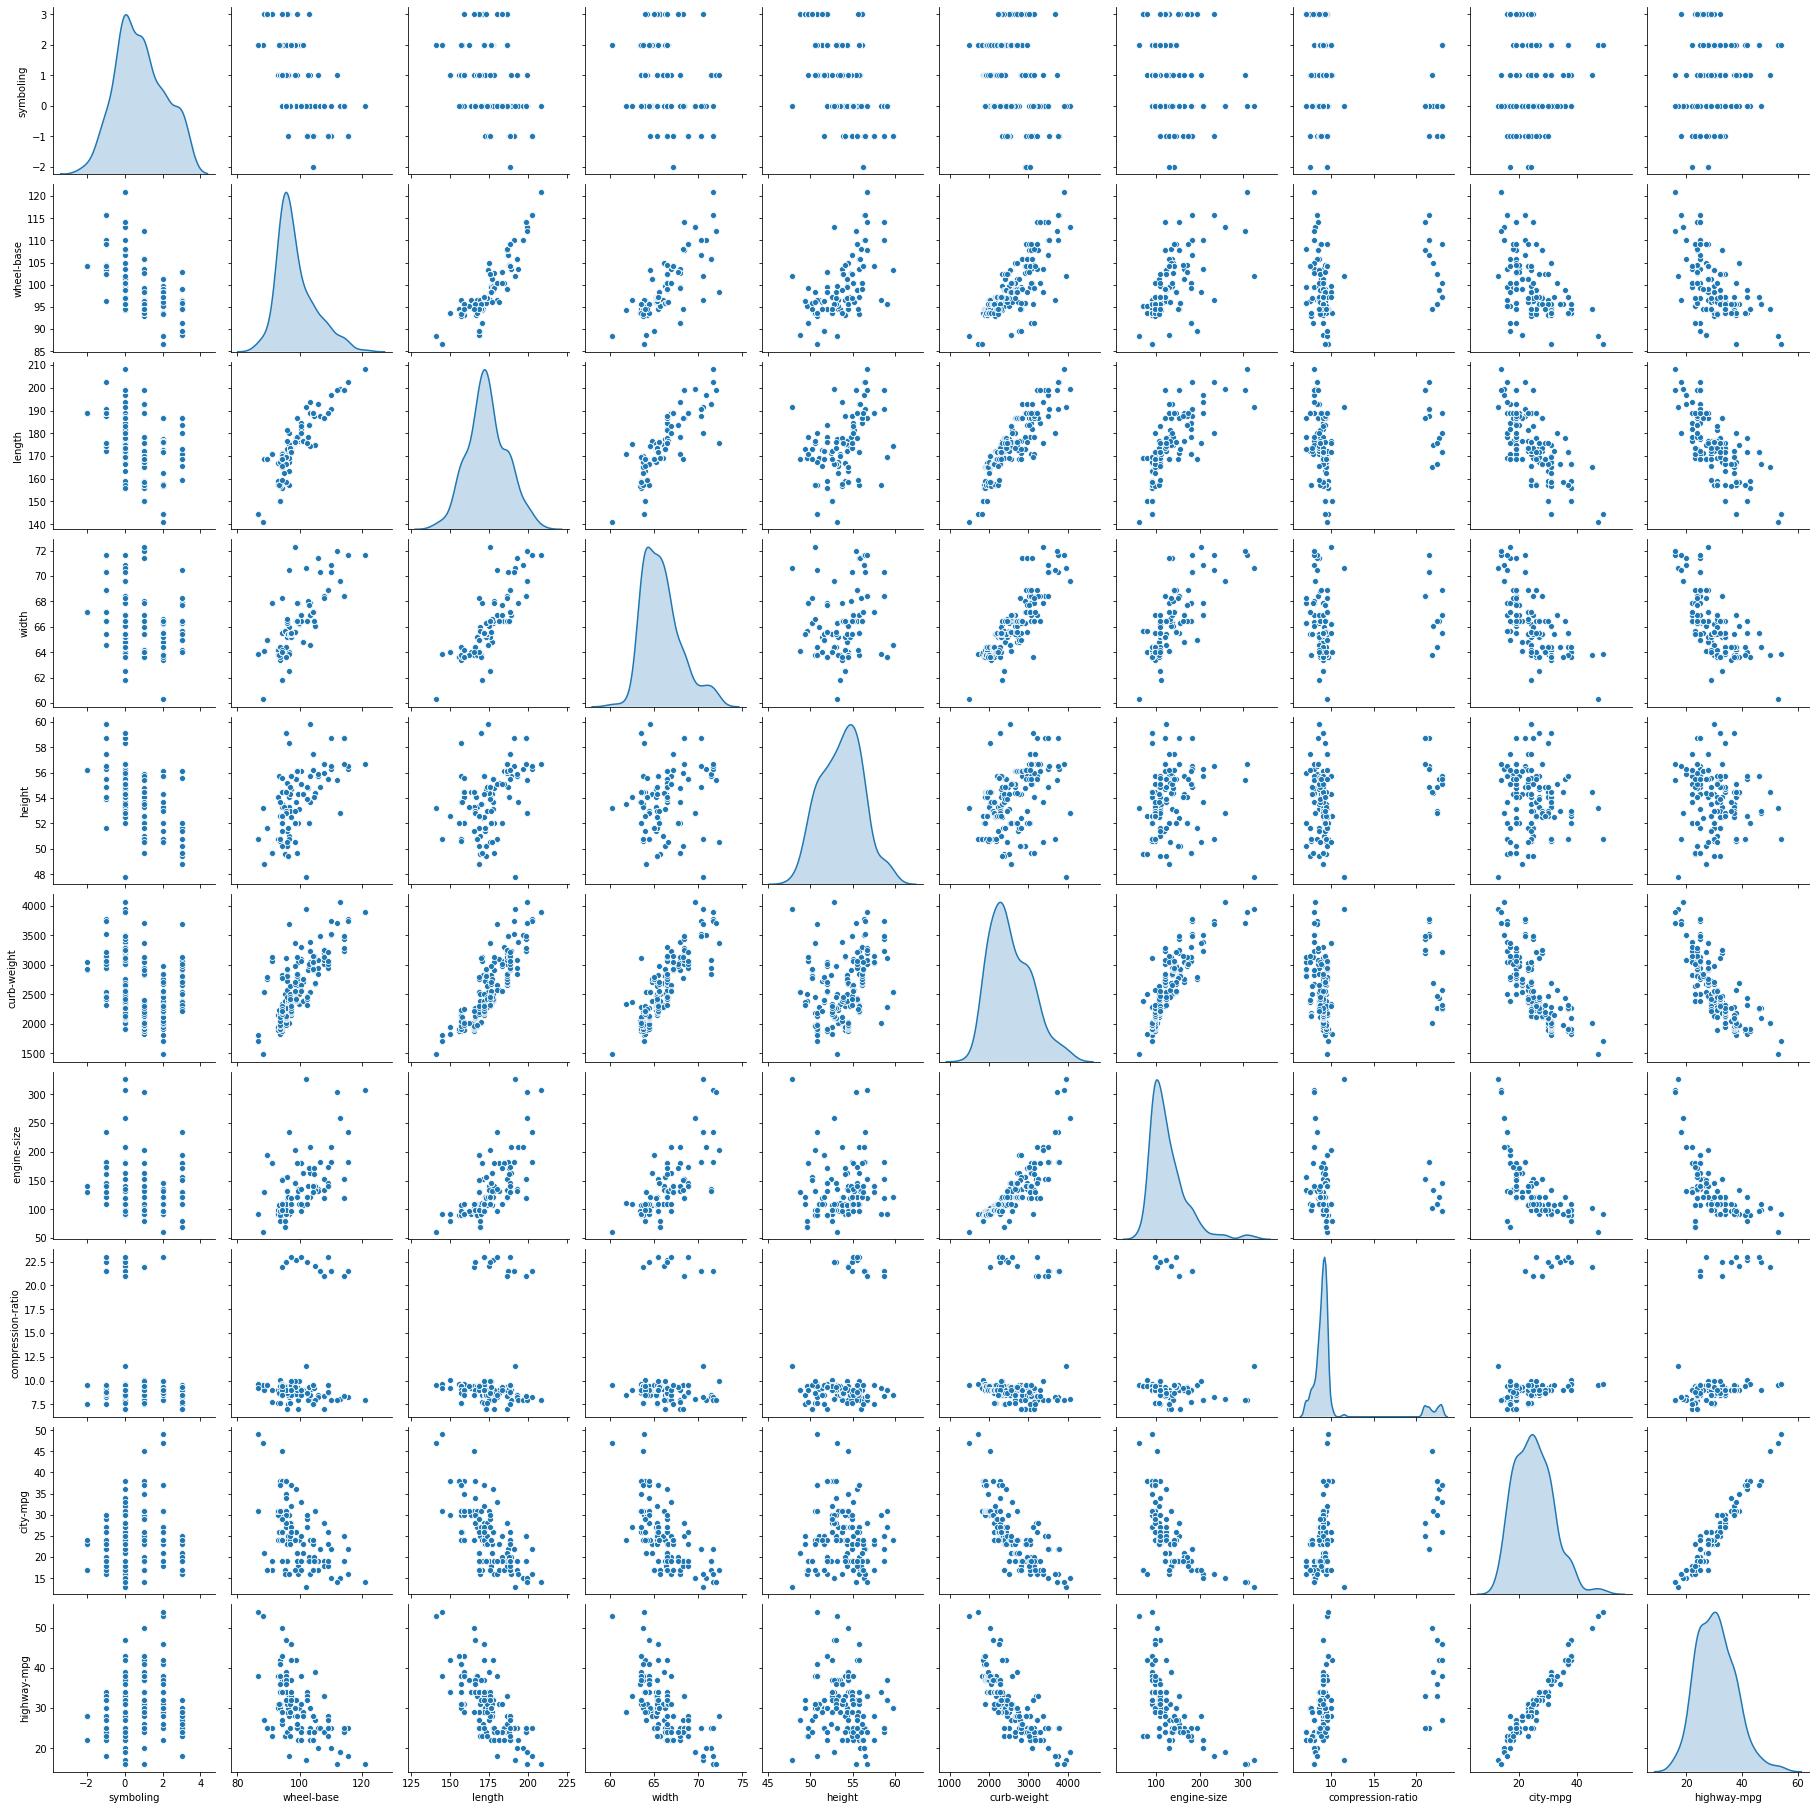

In [ ]:
plt.figure(figsize=(20,12))
sb.pairplot(dataset, diag_kind='kde')
plt.show()

In [8]:
# mengganti nilai '?' menjadi NaN
kolom = list(dataset.columns)
dataset[kolom] = dataset[kolom].replace('?', np.NaN)

In [10]:
dataset.isnull().sum().sort_values()

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
 engine-size          0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

In [11]:
# mengubah type 'object' ke type angka sesuai dengan nilainya
kolom_float = ['normalized-losses', 'horsepower', 'peak-rpm', 'bore', 'stroke']

dataset[kolom_float] = dataset[kolom_float].astype(float)

In [12]:
# melihat perubahn type data dan data null
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [13]:
# merekayasa nilai feture NaN menjadi nilai rata-rata pada masing-masing feature
for n in kolom_float: 
  dataset[n] = dataset[n].fillna(dataset[n].mean())

In [14]:
dataset.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
num-of-doors         2
price                4
dtype: int64

In [16]:
dataset['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [20]:
dataset['num-of-doors'].replace(np.NaN, 'four', inplace=True)

dataset.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
price                4
dtype: int64

In [21]:
# menghapus data nan pada kolom price
dataset.dropna(subset=['price'], axis=0, inplace=True)

dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [22]:
dataset.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [23]:
# mengubah type data
kolom_float = ['peak-rpm', 'bore', 'stroke', 'price']
kolom_int = ['normalized-losses', 'horsepower']

dataset[kolom_float] = dataset[kolom_float].astype(float)
dataset[kolom_int] = dataset[kolom_int].astype(int)

In [24]:
dataset.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

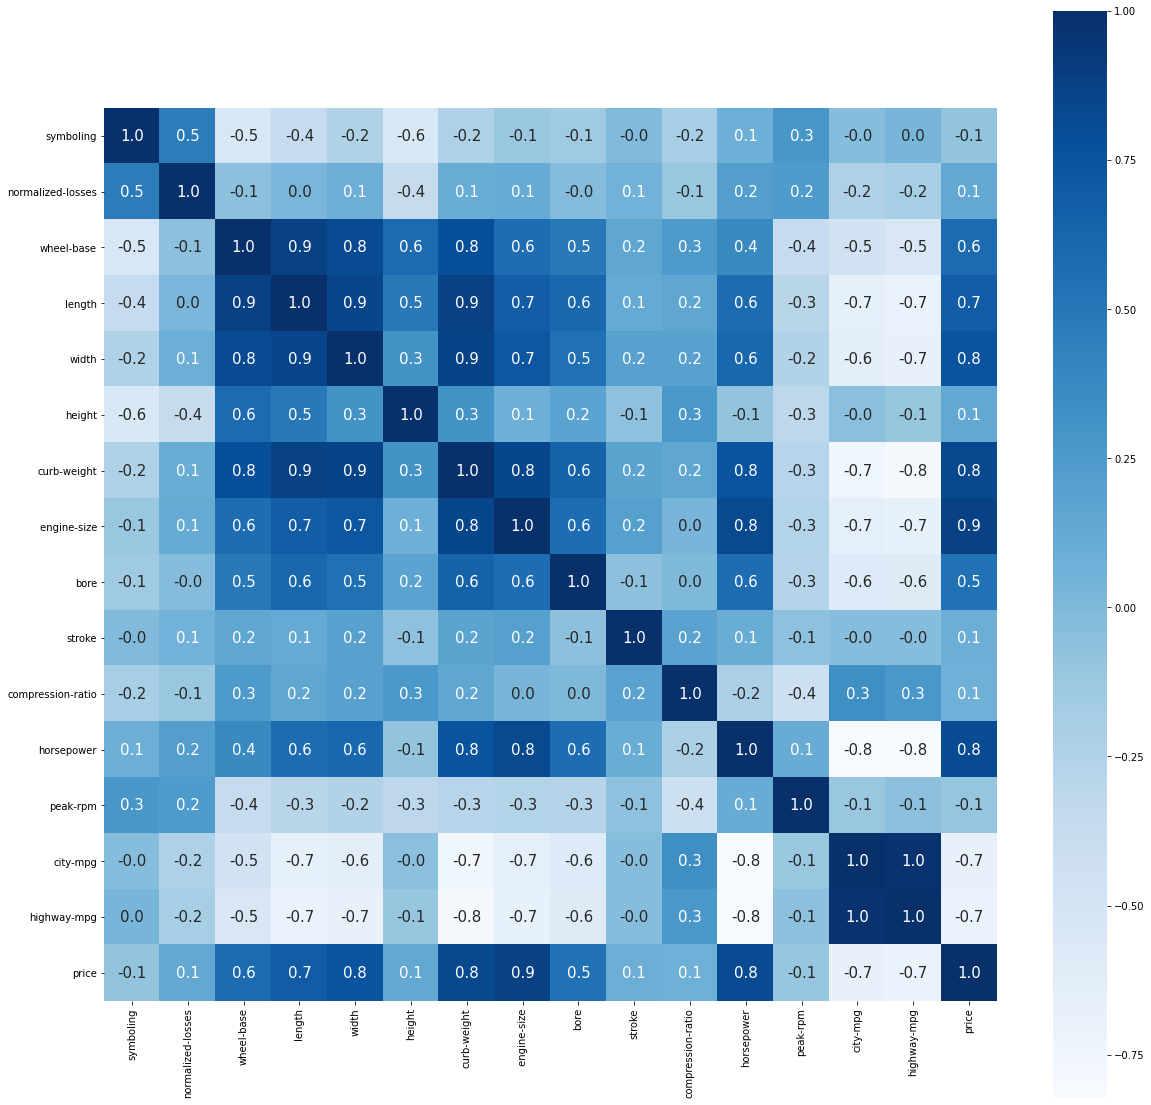

In [25]:
# memvisualisasikan korelasi data
corr = dataset.corr()

plt.figure(figsize=(20,20))
sb.heatmap(corr, annot=True, cbar=True, square= True, fmt='.1f', annot_kws={'size':15}, cmap='Blues')
plt.show()

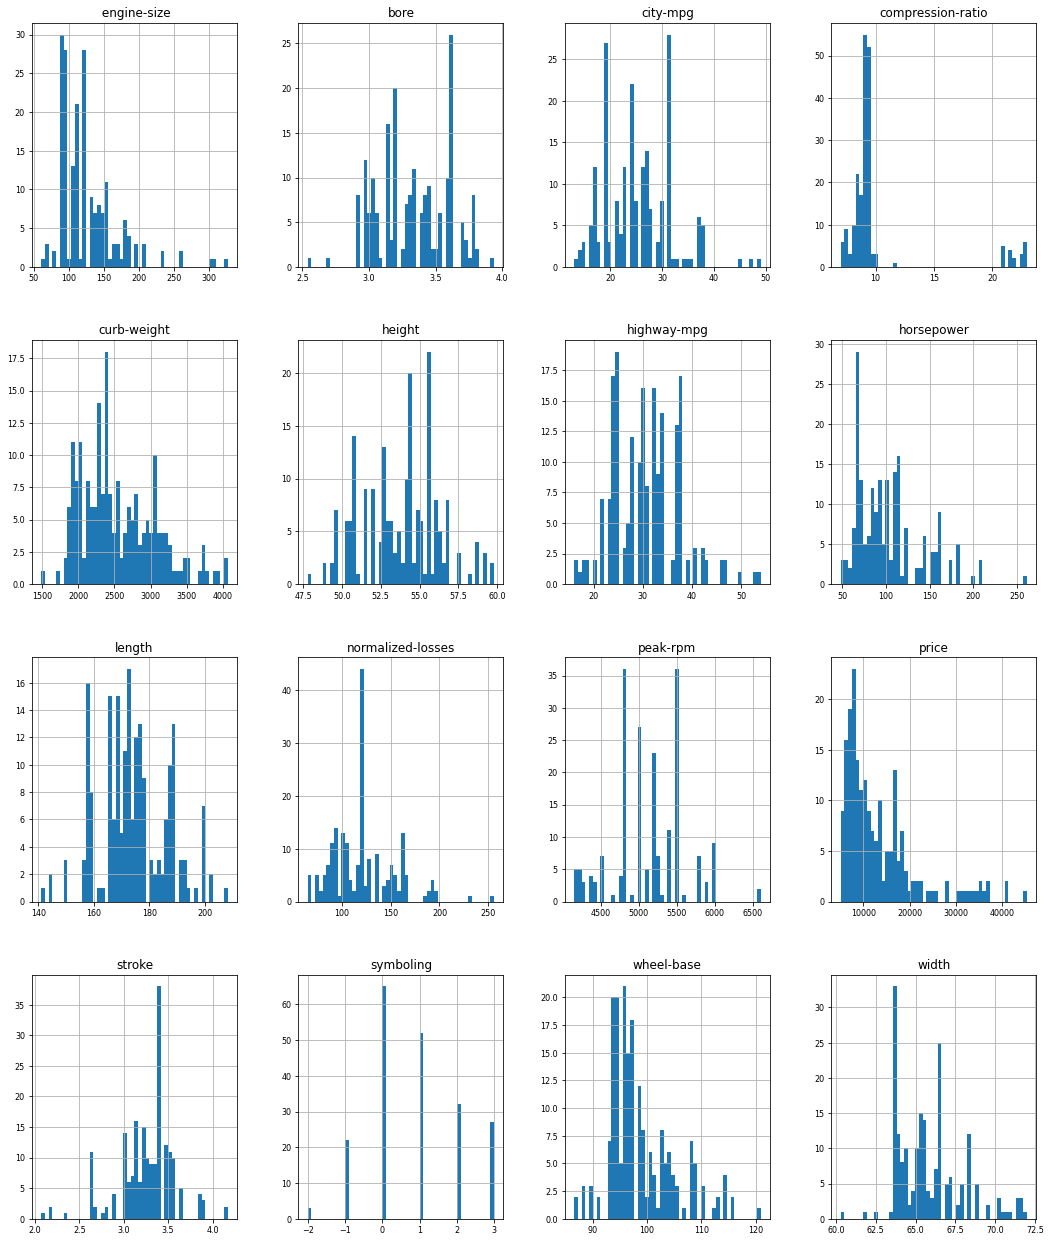

In [26]:
# EDA hist
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [ ]:
# # membagi data feature dan label dan menghapus kolom yang tidak diperlukan
# kolom_hapus = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
#                'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
#                'fuel-system', 'price', 'symboling', 'normalized-losses', 'height',
#                'stroke', 'compression-ratio', 'peak-rpm']
# feature = dataset.drop(kolom_hapus, axis=1)
# # mengubah data kategori menjadi angka
# label = dataset['price']

In [27]:
# membagi data feature dan label
feature = dataset.drop(['price'], axis=1)
# mengubah data kategori menjadi angka
feature = pd.get_dummies(feature)

label = dataset['price']

In [28]:
feature.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# Assignment 8

**Untuk dataset**: Boston Housing, Wine Quality, & Automobile

1. Lakukan preprocessing terhadap data menggunakan:
  - StandardScaler
  - Yeo-Johnson (PowerTransformer)
  - Box-Cox Transformation (PowerTransformer)
  - QuantileTransformer
  - MinMaxScaler
  - MaxAbsScaler
  - RobustScaler

  Dan jelaskan apabila hasil training untuk algoritma LinearRegression untuk masing-masing metode transformasi data dibandingkan!

  Jelaskan juga apabila terdapat metode preprocessing yang tidak dapat digunakan untuk salah satu dataset!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10

2. Gunakan algoritma berikut dan lakukan percobaan hyperparameter tuning untuk mendapatkan hasil terbaik:
  - Random Forest Regressor
  - XGBoost
  - SVM Regressor
  - KNN Regressor

  Hitung angka r^2 serta RMSE untuk menentukan mana algoritma yang paling baik!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10

# Jawaban No. 1

## Preprocessing

In [29]:
# melakukan scalling dan membagi feture dan label
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

standard_scaler = preprocessing.StandardScaler() 
power_transformer_yj = preprocessing.PowerTransformer(method='yeo-johnson') 
power_transformer_bc = preprocessing.PowerTransformer(method='box-cox')
quantile_transformer = preprocessing.QuantileTransformer()
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
robust_scaler = preprocessing.RobustScaler()

scalling =[standard_scaler, power_transformer_yj, power_transformer_bc,
           quantile_transformer, min_max_scaler, max_abs_scaler, robust_scaler]

feature_train = []
feature_test = []
label_train = []
label_test = []

for scaler in scalling:
  try:
    feature_scaled = scaler.fit_transform(feature.values)
    label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()
    x_train, x_test, y_train, y_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)
    feature_train.append(x_train)
    feature_test.append(x_test)
    label_train.append(y_train)
    label_test.append(y_test)

  except:
    # melihat scalling yang tidak dapat digunakan
    print('Error terjadi pada: ', scaler)
    print('Karene tidak dapat mengoleh data yang bernilai minus atau nol')
    print('\n')
    pass

Error terjadi pada:  PowerTransformer(copy=True, method='box-cox', standardize=True)
Karene tidak dapat mengoleh data yang bernilai minus atau nol




/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


## Melatih Model dan Evaluasi

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr_model = LinearRegression()

# list scalling yang bisa digunakan
scalling_use =['standard_scaler', 'power_transformer_yj', 'quantile_transformer', 
           'min_max_scaler', 'max_abs_scaler', 'robust_scaler']

for i in range(6):  
  lr_model.fit(feature_train[i], label_train[i])

  # prediksi
  feature_train_pred = lr_model.predict(feature_train[i])
  feature_test_pred = lr_model.predict(feature_test[i])

  # evaluasi
  score_x = r2_score(label_train[i], feature_train_pred)
  score_y = r2_score(label_test[i], feature_test_pred)
  rmse_x = np.sqrt(mean_squared_error(label_train[i], feature_train_pred))
  rmse_y = np.sqrt(mean_squared_error(label_test[i], feature_test_pred))


  print('Berikut hasil evaluasi dengan scalling: ', scalling_use[i])
  print('- Nilai r2_score train \t:', round(score_x, 2))
  print('- Nilai r2_score test \t:', round(score_y, 2))
  print('- Nilai RMSE train \t:', round(rmse_x, 2))
  print('- Nilai RMSE test \t:', round(rmse_y, 2))
  print('\n')

Berikut hasil evaluasi dengan scalling:  standard_scaler
- Nilai r2_score train 	: 0.97
- Nilai r2_score test 	: 0.85
- Nilai RMSE train 	: 0.18
- Nilai RMSE test 	: 0.32


Berikut hasil evaluasi dengan scalling:  power_transformer_yj
- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


Berikut hasil evaluasi dengan scalling:  quantile_transformer
- Nilai r2_score train 	: 0.95
- Nilai r2_score test 	: -9.416282789280271e+23
- Nilai RMSE train 	: 0.07
- Nilai RMSE test 	: 273474969713.99


Berikut hasil evaluasi dengan scalling:  min_max_scaler
- Nilai r2_score train 	: 0.97
- Nilai r2_score test 	: -2.73178115330254e+21
- Nilai RMSE train 	: 0.03
- Nilai RMSE test 	: 8454776431.14


Berikut hasil evaluasi dengan scalling:  max_abs_scaler
- Nilai r2_score train 	: 0.97
- Nilai r2_score test 	: 0.84
- Nilai RMSE train 	: 0.03
- Nilai RMSE test 	: 0.06


Berikut hasil evaluasi dengan scalling:  robust_scaler
- Nilai r2_score trai

## Kesimpulan:
- Ada satu tipe scalling yang tidak dapat digunakan yaitu **PowerTransformer(method=box-cox)** karena jenis ini tidak dapat mengolah data yang ada bernilai minus atau nol dan hanya bekerja dengan nilai-nilai yang sangat positif. Sedangkan pada data automobil ini memiliki nilai nol pada data yang dilakukan one hot decoder.
- Dengan menggunakan algoritma LinearRegression dengan berbagai type scalling yang digunakan dapat diketahui bahwa dengan tipe scalling **PowerTransformer 'yoe johnson** yang memiliki nilai r2_score yang tinggi antara data train dan data testnya (r2_score train = 1 dan r2_score test = 1) serta memiliki nilai RMSE yang termasuk rendah juga (RMSE train = 0.0 dan RMSE test = 0.0) namun hal ini bukan type preprocessing yang paling bagus karena ada suatu perhitungan yang menghasilkan jelek namun terlihat bagus (dapat dilihat pada percobban jawaban no.2 pada algoritma Rendom Forest) dimana dapat dilihat hasil grafiknya menghasilkan satu titik point saja untuk keseluruhan data.
- Jadi pda kasus ini, preprocessing dengan hasil yang terbaik yaitu Standard Scaler dengan nilai r2_score train = 0.97 dan r2_score test = 0.85.

# Jawaban No. 2

## Preprocessing

## RandomForestRegressor dengan Scalling Power Transformer

In [31]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# scalling
scaler = PowerTransformer(method='yeo-johnson')
feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [32]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=3000, max_features='sqrt', max_depth=10)
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 1.0
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.0


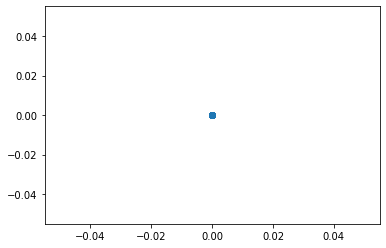

In [33]:
plt.scatter(label_test, test_pred)
plt.show()

## Random Forest Regressor dengan Scalling Standard Scaler

In [34]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# scalling
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=3000, max_features='sqrt', max_depth=10)
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.99
- Nilai r2_score test 	: 0.93
- Nilai RMSE train 	: 0.11
- Nilai RMSE test 	: 0.22


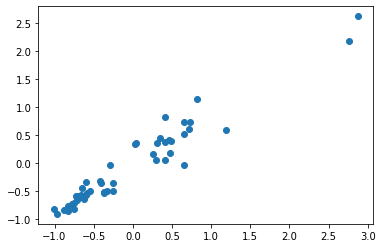

In [36]:
plt.scatter(label_test, test_pred)
plt.show()

## XGBoost dengan Scalling Standard Scaler

In [37]:
# melatih dataset dengan algoritma xgboost
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
xgbr_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, eta=0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 15, n_estimators = 1000)
xgbr_model.fit(feature_train, label_train)

# prediksi
train_pred = xgbr_model.predict(feature_train)
test_pred = xgbr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 0.93
- Nilai RMSE train 	: 0.01
- Nilai RMSE test 	: 0.21


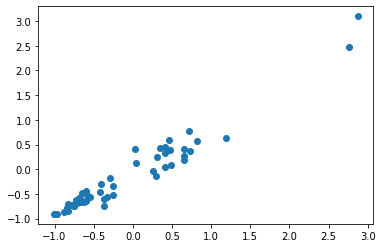

In [38]:
plt.scatter(label_test, test_pred)
plt.show()

## SVM Regressor dengan Scalling Standard Scaler

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', gamma='scale', C=10)
svr_model.fit(feature_train, label_train)

# prediksi
train_pred = svr_model.predict(feature_train)
test_pred = svr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.99
- Nilai r2_score test 	: 0.77
- Nilai RMSE train 	: 0.1
- Nilai RMSE test 	: 0.39


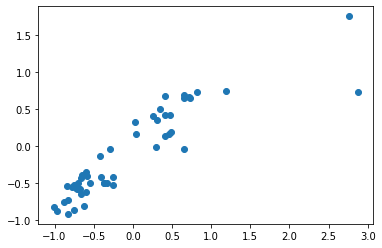

In [44]:
plt.scatter(label_test, test_pred)
plt.show()

## KNN Regressor dengan Scalling Standard Scaler

In [45]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='kd_tree')
knn_model.fit(feature_train, label_train)

# prediksi
train_pred = knn_model.predict(feature_train)
test_pred = knn_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 0.79
- Nilai RMSE train 	: 0.01
- Nilai RMSE test 	: 0.37


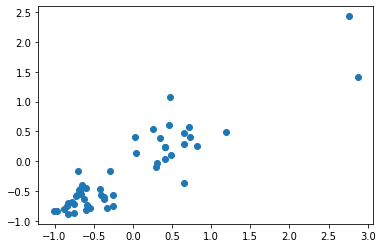

In [46]:
plt.scatter(label_test, test_pred)
plt.show()

## Kesimpulan:
- Algoritma diatas sudah saya pilih yang terbaik dari tuning parameternya.
- Preprocessing yang saya gunakan yaitu Standard Scaler karena berdasarkan percobaan pertanyaan no.1 (algoritma Linear Regressor) dimana Standard Scaler yang lebih baik.
- Dari keempat algoritma yang diterapkan, berdasarkan hasil evaluasi yang saya lakukan maka algoritma pertama yang paling cocok pada masalah ini yaitu *Random Forest Regressor*  (r2_score data training (0.99) dan data testing (0.93)) dan algoritma *XGboost Regressor* (r2_score data training (1.00) dan data testing (0.93)) yang keduanya memiliki nilai variancenya yang kecil sekitar 0.06 - 0.07 sehingga hasil prediksinya dapat dianggap bagus/cocok.
- Sedangkan pada algoritma *SVR* dan *KNN Regressor* juga memiliki nila r2_score data train yang bagus yaitu 0.99-1.00, namun r2_scor pada data test nya kecil 0.77-0.79 sehingga hasil prediksinya akan mendekati overfitting.
